# Sales product analysis

DAILLE Thomas

Data : https://www.kaggle.com/datasets/knightbearr/sales-product-data



In [8]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [60]:
# load data
data = pd.read_csv("Sales.csv",sep=",")

# 1. Exploratory Data analysis

## 1.1 Data discovery

In [ ]:
# sample data
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
# sample size
data.shape

(185686, 6)

In [ ]:
# metadatas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [ ]:
# basic statistics  
data.describe()

,Order ID,Quantity Ordered,Price Each
count,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255
std,51511.717183,0.443069,332.843838
min,141234.000000,1.000000,2.990000
25%,185833.250000,1.000000,11.950000
50%,230354.500000,1.000000,14.950000
75%,275028.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [ ]:
# distinct values discovery
uniqueValue_df = pd.DataFrame({'Column':[], 'Unique value number':[]})

for column in data.columns:
  new_row = {'Column':column, 'Unique value number':data[column].nunique()}
  uniqueValue_df = uniqueValue_df.append(new_row, ignore_index=True)

display(uniqueValue_df)

,Column,Unique value number
0,Order ID,178437.0
1,Product,19.0
2,Quantity Ordered,9.0
3,Price Each,17.0
4,Order Date,142395.0
5,Purchase Address,140787.0


## 1.2 Data processing

In [61]:
# convert the data
data['Order Date'] = pd.to_datetime(data['Order Date'])

# and check it 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [62]:
# add some columns
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data['Street'] = data['Purchase Address'].str.split(',').str[0].astype(str)
data['City'] = data['Purchase Address'].str.split(',').str[1].astype(str)
data['Postal Code'] = data['Purchase Address'].str.split(',').str[2].astype(str)
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day 
data['Hour'] = data['Order Date'].dt.hour 
data['Minute'] = data['Order Date'].dt.minute 

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Street,City,Postal Code,Year,Month,day,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX 75001,2019,4,19,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA 02215,2019,4,7,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA 90001,2019,4,12,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA 90001,2019,4,12,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA 90001,2019,4,30,9,27


In [16]:
# drop columns
data.drop(['Order Date', 'Purchase Address'], axis="columns", inplace=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Street,City,Postal Code,Year,Month,day,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,917 1st St,Dallas,TX 75001,2019,4,19,8,46
1,176559,Bose SoundSport Headphones,1,99.99,99.99,682 Chestnut St,Boston,MA 02215,2019,4,7,22,30
2,176560,Google Phone,1,600.00,600.00,669 Spruce St,Los Angeles,CA 90001,2019,4,12,14,38
3,176560,Wired Headphones,1,11.99,11.99,669 Spruce St,Los Angeles,CA 90001,2019,4,12,14,38
4,176561,Wired Headphones,1,11.99,11.99,333 8th St,Los Angeles,CA 90001,2019,4,30,9,27


In [7]:
# duplicate discovery
data.duplicated().sum()

0

In [8]:
# missing values discovery
missing_values_count = data.isnull().sum()
print(missing_values_count)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Sales               0
Street              0
City                0
Postal Code         0
Year                0
Month               0
day                 0
Hour                0
Minute              0
dtype: int64


In [9]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

0.00%


## 1.3 Data exploration

In [17]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt

# activate seaborn’s theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### What was the best month for sales? How much was earned that month?

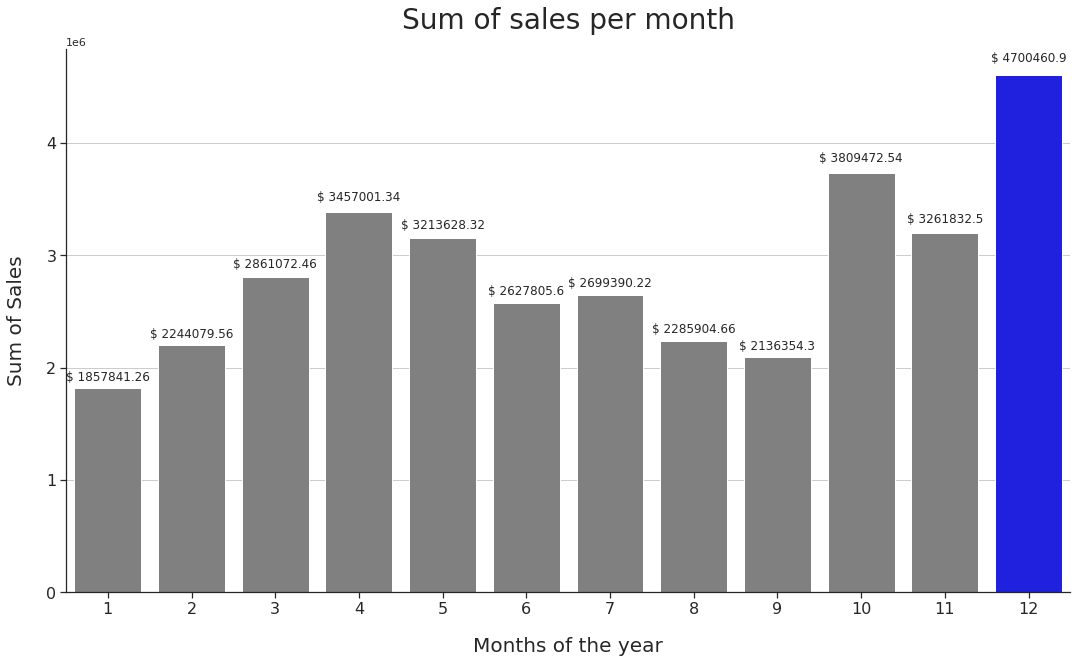

In [64]:
plt.figure(figsize = (18,10))
plt.grid(True)

sum_of_sales_by_month = data.groupby('Month').sum().astype('int')

cols = ['grey' if (x < max(sum_of_sales_by_month.Sales)) else 'blue' for x in sum_of_sales_by_month.Sales]

chart = sns.barplot(
    x = sum_of_sales_by_month.index,
    y = sum_of_sales_by_month.Sales, 
    data = sum_of_sales_by_month,
    palette = cols
)

chart.set_xlabel(
    "Months of the year",
    labelpad=20,
    fontsize=20
)

chart.set_ylabel(
    "Sum of Sales",
    labelpad=20,
    fontsize=20
)

chart.tick_params(labelsize=16)

chart.axes.set_title(
    "Sum of sales per month",
    pad=20,
    fontsize=28
)

# adding labels to bars
rects = chart.patches
for rect in rects:
  height = rect.get_height() + 0.02 * rect.get_height()
  chart.text(rect.get_x() + rect.get_width() / 2, height, "$ " + str(height),
          ha='center', va='bottom')
  
plt.show()


### What City had the highest number of sales?

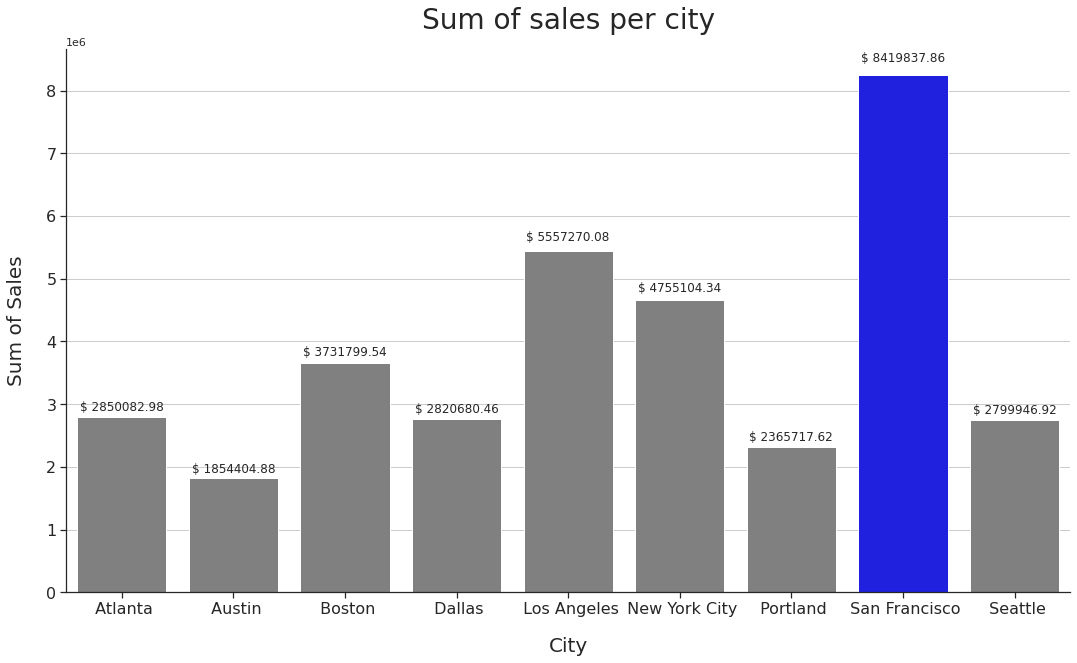

In [66]:
plt.figure(figsize = (18,10))
plt.grid(True)

sum_of_sales_by_city = data.groupby('City').sum().astype('int')

cols = ['grey' if (x < max(sum_of_sales_by_city.Sales)) else 'blue' for x in sum_of_sales_by_city.Sales]

chart = sns.barplot(
    x = sum_of_sales_by_city.index,
    y = sum_of_sales_by_city.Sales, 
    data = sum_of_sales_by_city,
    palette = cols
)

chart.set_xlabel(
    "City",
    labelpad=20,
    fontsize=20
)

chart.set_ylabel(
    "Sum of Sales",
    labelpad=20,
    fontsize=20
)

chart.tick_params(labelsize=16)

chart.axes.set_title(
    "Sum of sales per city",
    pad=20,
    fontsize=28
)

# adding labels to bars
rects = chart.patches
for rect in rects:
  height = rect.get_height() + 0.02 * rect.get_height()
  chart.text(rect.get_x() + rect.get_width() / 2, height, "$ " + str(height),
          ha='center', va='bottom')
  
plt.show()

### What time should we display adverstisement to maximize likelihood of customer's buying product?

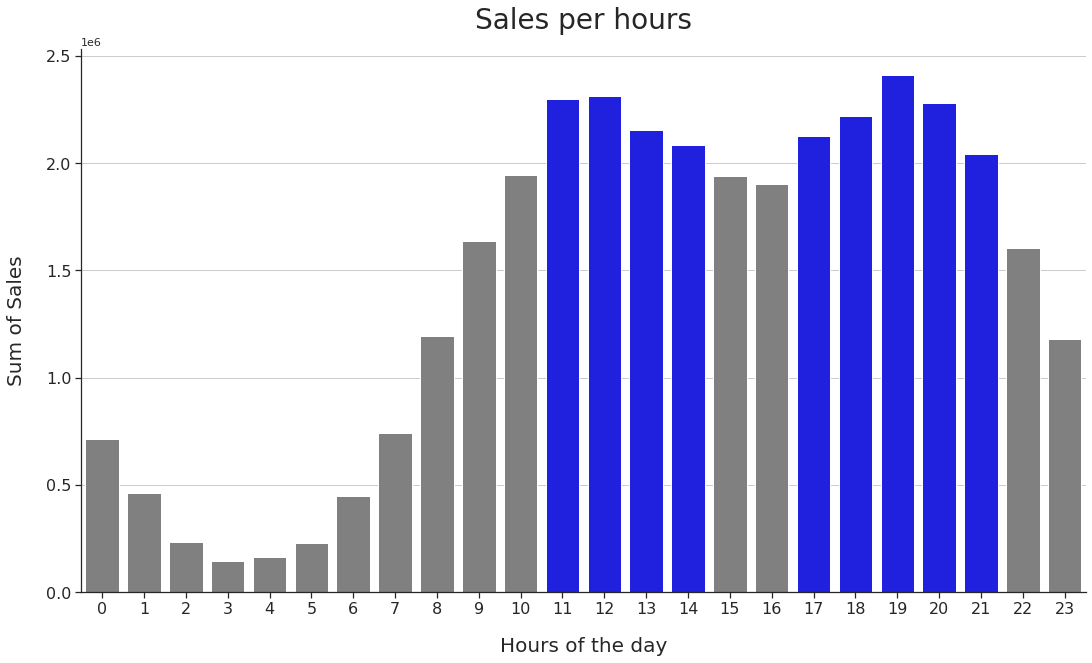

In [68]:
plt.figure(figsize = (18,10))
plt.grid(True)

sum_of_sales_per_hour = data.groupby('Hour').sum().astype('int')

cols = ['grey' if (x < 2000000) else 'blue' for x in sum_of_sales_per_hour.Sales]

chart = sns.barplot(
    x = sum_of_sales_per_hour.index,
    y = sum_of_sales_per_hour.Sales, 
    data = sum_of_sales_per_hour,
    palette = cols
)

chart.set_xlabel(
    "Hours of the day",
    labelpad=20,
    fontsize=20
)

chart.set_ylabel(
    "Sum of Sales",
    labelpad=20,
    fontsize=20
)

chart.tick_params(labelsize=16)

chart.axes.set_title(
    "Sales per hours",
    pad=20,
    fontsize=28
)

plt.show()

### What products are most often sold together?

In [70]:
# drop it using duplicated() funct
peer_data = data[data['Order ID'].duplicated(keep=False)]

# create a new column
peer_data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# let's make a new variable
peer_data = peer_data[['Order ID', 'Grouped']].drop_duplicates()

# create a new variable for Counter
count = Counter()

# initialise the list
pairList = []

# make a for loop
for row in peer_data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    pair = []
    pair.append(key)
    pair.append(value)
    pairList.append(pair)

peer_data = pd.DataFrame(pairList, columns=['Pair', 'Count'])
peer_data.head()

<ipython-input-70-a682cd160edb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peer_data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Pair,Count
0,"(iPhone, Lightning Charging Cable)",1002
1,"(Google Phone, USB-C Charging Cable)",985
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",413
4,"(Vareebadd Phone, USB-C Charging Cable)",361


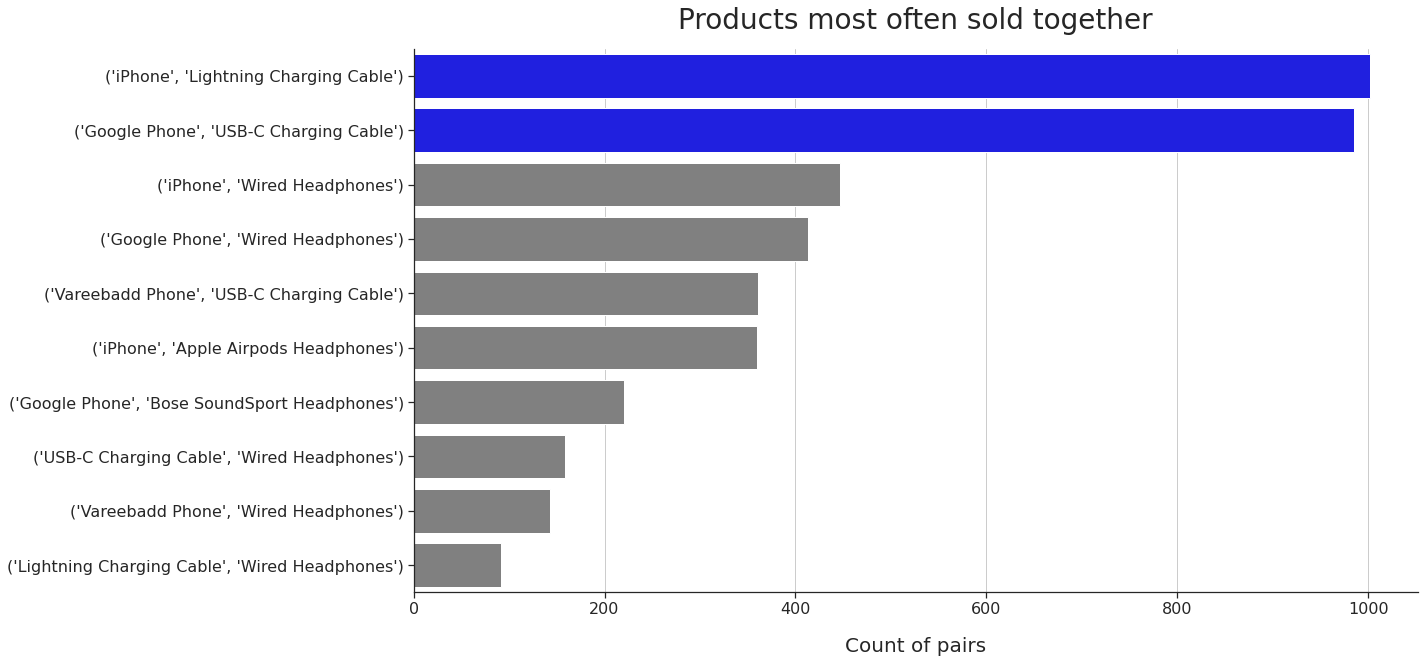

In [78]:
plt.figure(figsize = (18,10))
plt.grid(True)

cols = ['grey' if (x < 900) else 'blue' for x in peer_data.Count]

chart = sns.barplot(
    x = peer_data.Count,
    y = peer_data.Pair, 
    data = peer_data,
    palette = cols
)

chart.set_xlabel(
    "Count of pairs",
    labelpad=20,
    fontsize=20
)

chart.set_ylabel(
    "",
    labelpad=20,
    fontsize=20
)

chart.tick_params(labelsize=16)

chart.axes.set_title(
    "Products most often sold together",
    pad=20,
    fontsize=28
)
  
plt.show()

### What product sold the most? Why do you think it sold the most?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


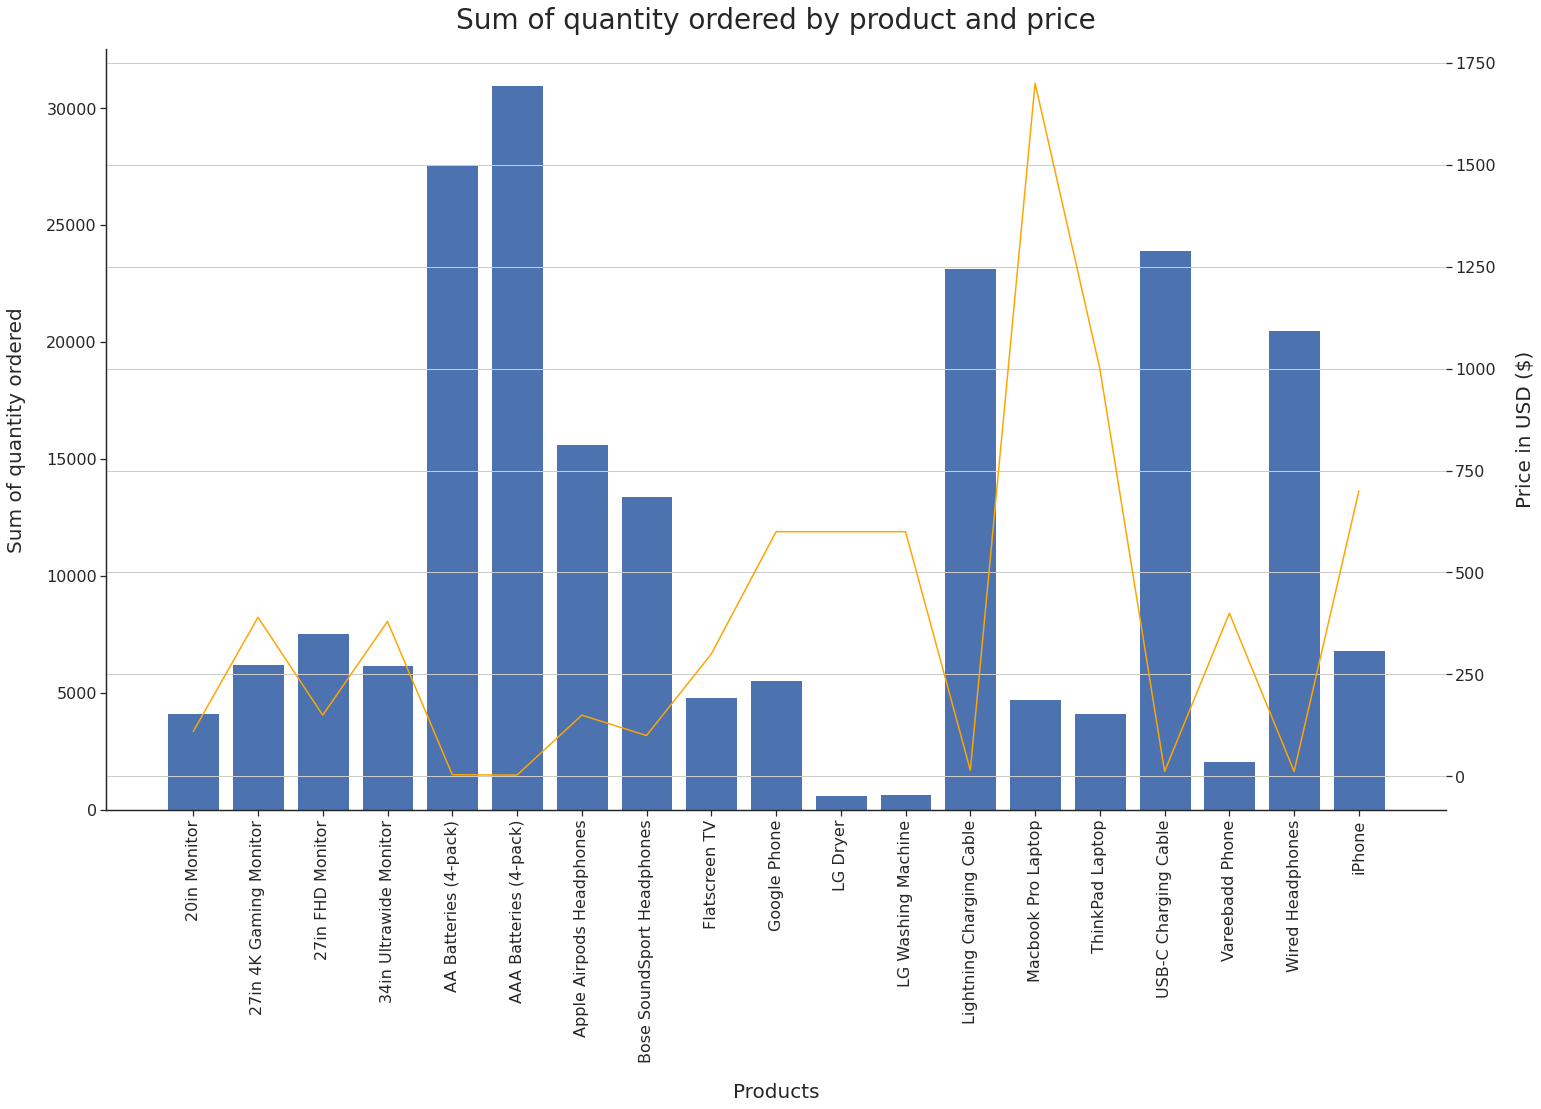

In [76]:
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()
plt.grid(True)

product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]

# first plot
ax1.bar(products, quantity_ordered)

ax1.set_xlabel(
    "Products",
    labelpad=20,
    fontsize=20
)

ax1.set_ylabel(
    "Sum of quantity ordered",
    labelpad=20,
    fontsize=20
)

ax1.set_title(
    "Sum of quantity ordered by product and price",
    pad=20,
    fontsize=28
)

ax1.set_xticklabels( 
    products,
    rotation="vertical", 
)

# 2nd plot
sns.lineplot( 
    products,
    prices, 
    color="orange",
)

ax2.set_ylabel( 
    "Price in USD ($)", 
    labelpad=20,
    fontsize=20
);

ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)